# ML Lab
## Part 1 Preprocessing and EDA

In [2]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import re
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [3]:
 orders = pd.read_csv('data/Orders.csv', index_col=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133A4BB0>,
      dtype=object)

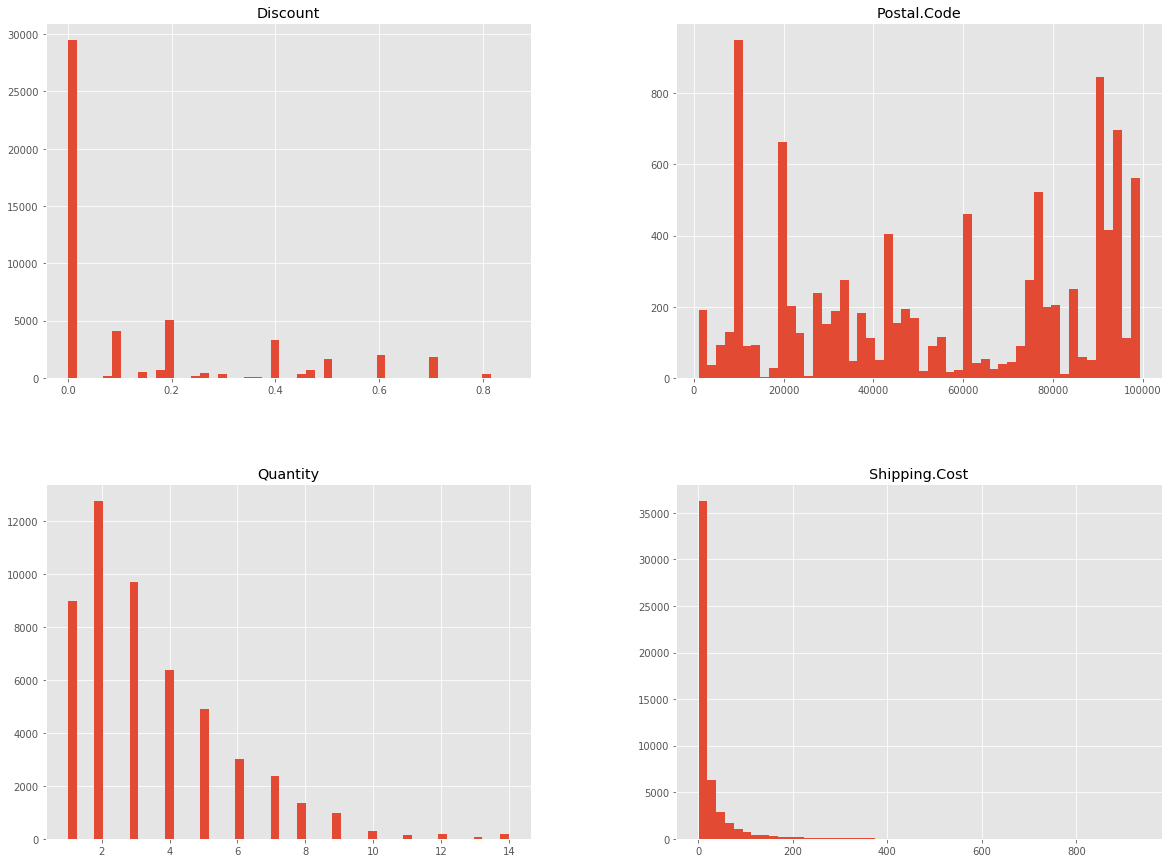

In [4]:
orders.hist(bins=50, figsize=(20,15))

In [5]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [6]:
orders['Sales'] = orders['Sales'].replace('[\$,]', '', regex=True).astype(float)
orders['Profit'] = orders['Profit'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
orders.head(2)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical


# Inventory Analysis

#### Key Conclusions:
1. [complete]
2. [complete]
3. [complete] 

### Weekly Sales DataFrames

In [78]:
# New DataFrame: Weekly Sales

orders_sales = orders[['Ship.Date', 'Sales', 'Quantity', 'Category']]
orders_sales.head()
orders_sales['week'] = orders_sales['Ship.Date']
orders_sales['week'] = pd.to_datetime(orders_sales['week'], yearfirst=True).dt.week # Create Weel Column

c:\users\alejandro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\alejandro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [75]:
#  New DataFrame: Total Weekly Sales
orders_week = orders_sales.groupby(['week', 'Category']).agg({'Quantity': 'sum'})
orders_week = orders_week.reset_index(drop=False)
orders_week['quantity_cum'] = orders_week.Quantity.cumsum()
orders_week.head()

,week,Category,Quantity,quantity_cum
0,1,Furniture,233,233
1,1,Office Supplies,659,892
2,1,Technology,225,1117
3,2,Furniture,783,1900
4,2,Office Supplies,2385,4285


In [76]:
# New DataFrame: Weekly Sales by Category
orders_wk_cat = orders_week.pivot_table(values='Quantity', columns='Category', index='week').reset_index(drop=False)
orders_wk_cat.head()

Category,week,Furniture,Office Supplies,Technology
0,1,233,659,225
1,2,783,2385,764
2,3,831,2451,900
3,4,452,1297,347
4,5,198,865,227


### Weekly Sales Graphs

Text(0.5,1,'Weekly Orders: By Category')

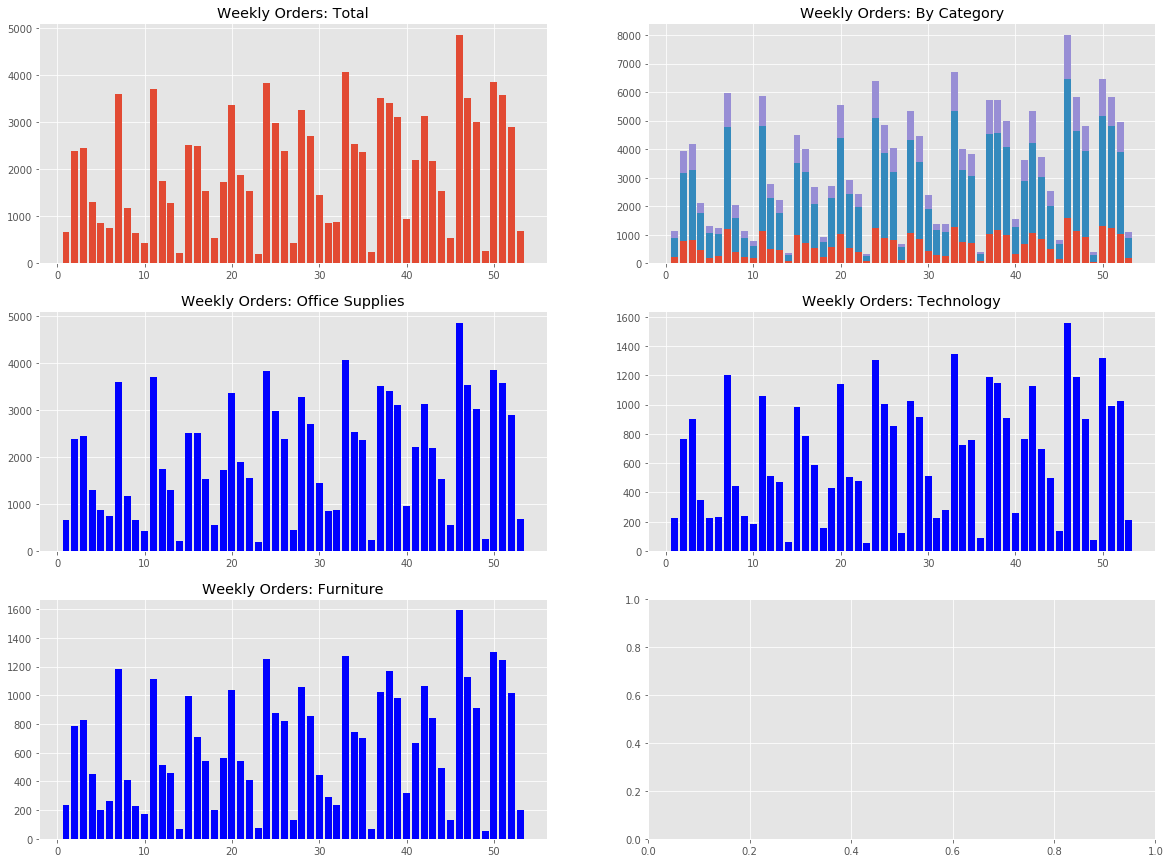

In [66]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Bar Graph: Total
axes[0,0].bar(orders_week['week'], orders_week['Quantity'])
axes[0,0].set_title('Weekly Orders: Total')

# Bar Graph: Furniture, Office Supplies, Tech
axes[1,0].bar(orders_wk_cat['week'], orders_wk_cat['Office Supplies'], color='b')
axes[1,0].set_title('Weekly Orders: Office Supplies')

axes[1,1].bar(orders_wk_cat['week'], orders_wk_cat['Technology'], color='b')
axes[1,1].set_title('Weekly Orders: Technology')

axes[2,0].bar(orders_wk_cat['week'], orders_wk_cat['Furniture'], color='b')
axes[2,0].set_title('Weekly Orders: Furniture')

# Stacked Bar Graph: All Categories
axes[0,1].bar(orders_wk_cat['week'], orders_wk_cat['Furniture'])
axes[0,1].bar(orders_wk_cat['week'], orders_wk_cat['Office Supplies'], bottom=orders_wk_cat['Furniture'])
axes[0,1].bar(orders_wk_cat['week'], orders_wk_cat['Technology'], bottom=orders_wk_cat['Furniture']+orders_wk_cat['Office Supplies'])
axes[0,1].set_title('Weekly Orders: By Category')


### Problem 3: Why did customers make returns?

Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

#### Display all Column/Rows

In [119]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

#### Pull Returns.csv

In [103]:
df_returns = pd.read_csv('Returns.csv')

In [159]:
df_returns.head()

(1079, 3)

#### Pre-Process Dataset: Merge Orders.csv & Returns.csv

In [111]:
df_returns.rename(columns={'Order ID': 'Order.ID'}, inplace=True)

In [256]:
orders.head(2)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical


Create New Order Dataframe: Keep important columns

In [154]:
orders_2 = orders[['Order.ID', 'Customer.ID', 'Category', 'Sub.Category', 'Sales', 'Profit']]
orders_2.head()
orders_2.shape

Merge Datasets

In [179]:
df_returns_merged = pd.merge(orders_2,
                            df_returns,
                            left_on='Order.ID', right_on='Order.ID', how='inner')

In [189]:
df_returns_merged.head(5)
# df_returns_merged.shape

,Order.ID,Customer.ID,Category,Sub.Category,Sales,Profit,Returned,Region
0,IN-2012-PB19210127-41259,PB-19210127,Furniture,Tables,1715.16,720.36,Yes,Eastern Asia
1,IN-2012-PB19210127-41259,PB-19210127,Furniture,Bookcases,2197.50,153.75,Yes,Eastern Asia
2,IN-2012-PB19210127-41259,PB-19210127,Furniture,Tables,1356.03,311.85,Yes,Eastern Asia
3,IN-2012-PB19210127-41259,PB-19210127,Furniture,Chairs,882.15,114.60,Yes,Eastern Asia
4,IN-2012-PB19210127-41259,PB-19210127,Technology,Machines,148.32,68.22,Yes,Eastern Asia


#### 1. How much profit did we lose due to returns each year?

In [186]:
print('Profit Lost:', df_returns_merged['Profit'].sum())

Profit Lost: 61370.75


#### 2. How many customer returned more than once? more than 5 times?

In [208]:
customer_return = df_returns_merged.groupby(['Customer.ID']).agg({'Returned': 'count'})
print('Customers Returned 5+ Times: ', customer_return[customer_return['Returned']>5].count()[0])

Customers Returned 5+ Times:  46


#### 3. Which regions are more likely to return orders?

In [247]:
region_returns = df_returns_merged.groupby(['Region']).agg({'Returned': 'count'}).sort_values('Returned', axis=0, ascending=False)
region_returns.reset_index()

,Region,Returned
0,Central America,248
1,Western Europe,233
2,Western US,180
3,Oceania,154
4,Southeastern Asia,140
5,Eastern US,134
6,South America,133
7,Eastern Asia,131
8,Southern Europe,112
9,Southern Asia,111


In [226]:
# plt.bar(region_returns['Region'], region_returns['Returned'])

#### 4. Which categories (sub-categories) of products are more likely to be returned?

Category: 1348
Sub-Category: Binders, Art, Storage

In [257]:
category_returns = df_returns_merged.groupby(['Category']).agg({'Returned': 'count'})
subcategory_returns = df_returns_merged.groupby(['Sub.Category']).agg({'Returned': 'count'})


category_returns = category_returns.sort_values('Returned', axis=0, ascending=False)
subcategory_returns = subcategory_returns.sort_values('Returned', axis=0, ascending=False)

In [254]:
category_returns

,Returned
Category,
Office Supplies,1348
Technology,445
Furniture,427


In [255]:
subcategory_returns

,Returned
Sub.Category,
Binders,269
Art,217
Storage,212
Paper,150
Chairs,147
Phones,145
Accessories,138
Labels,137
Furnishings,135
